In [1]:
from dalila.dictionary_learning import StabilityDictionaryLearning,DictionaryLearning
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from joblib import Parallel, delayed
import multiprocessing


In [2]:
from utils import *

In [3]:
from scipy.io import loadmat
from unicodedata import normalize
filename = "/home/veronica/Desktop/UVM/mutation_signatures/datasets/breast_cancer_data.mat"
data = loadmat(filename, appendmat=False)
v = data["originalGenomes"]
types = data["types"]
l = len(types)
types_1 = [None] * l
for i in range(0, l):
    types_1[i] = normalize('NFKD', types[i][0][0]).encode('ascii','ignore')
data = v.T
types = np.asarray(types_1)



res = remove_weak_mutations(data, 0.01)
X = res["mutational_catalogue"]
removed_cols = res["removed_cols"]

In [ ]:
# estimator = DictionaryLearning(k=7, non_negativity="both")
# estimator.fit(X)
# C_one_shot, D_one_shot = estimator.decomposition()


In [ ]:
# D_one_shot = add_removed_cols(D_one_shot, removed_cols)
# D_ordered = ordering_for_types(D_one_shot, types)

In [4]:
def process_input(k, X):
    print("NUMBER OF ATOMS: ", k)
    estimator = StabilityDictionaryLearning(k=k, non_negativity="both")
    estimator.fit(X)
    C, D = estimator.decomposition()
    return C, D, estimator.stability, np.sum((X - C.dot(D))**2)
    

In [5]:
num_cores = multiprocessing.cpu_count()
possible_atoms = np.arange(2,9)
results = Parallel(n_jobs=num_cores)(delayed(process_input)(k, X) for k in possible_atoms)


('NUMBER OF ATOMS: ', 5)
('NUMBER OF ATOMS: ', 4)
('NUMBER OF ATOMS: ', 2)
('NUMBER OF ATOMS: ', 6)
('NUMBER OF ATOMS: ', 8)
('NUMBER OF ATOMS: ', 7)
('NUMBER OF ATOMS: ', 3)
('Difference', 59.305879514993535)
('Difference', 8.6518753223065883e-05)
('Difference', 204.57034586472665)
('Difference', 145.69148843107109)
('Difference', 172.86101980956758)
('Difference', 0.026645677260295993)
('Difference', 114.88444249466905)
('Difference', 233.41427802721665)
('Difference', 0.039739207955373397)
('Difference', 83.88543787751442)
('Difference', 0.091926475378499656)
('Difference', 0.078336656304332342)
('Difference', 0.071476143453499202)
('Difference', 0.026591893590495581)
('Difference', 0.0027814580467321187)
('Difference', 0.12520743647280586)
('Difference', 0.0045524154140061078)
('Difference', 0.015615530700186557)
('Difference', 0.013120296341783881)
('Difference', 0.028467468900585997)
('Difference', 0.0087253036314507409)
('Difference', 0.063381910027676985)
('Difference', 0.00173

In [6]:
Cs = []
Ds = []
stabilities = []
errors = []
for k in range(len(results)):
    Cs.append(results[k][0])
    Ds.append(results[k][1])
    stabilities.append(results[k][2])
    errors.append(results[k][3])

In [ ]:
np.save("breast25_hisMethod/all_dictionaries_bello.npy", Ds)
for i,C in enumerate(Cs):
    np.save("breast25_hisMethod/coefficients_bello"+str(i)+".npy", C)
np.save("breast25_hisMethod/stabilities_bello.npy", stabilities)
np.save("breast25_hisMethod/errors_bello.npy", errors)

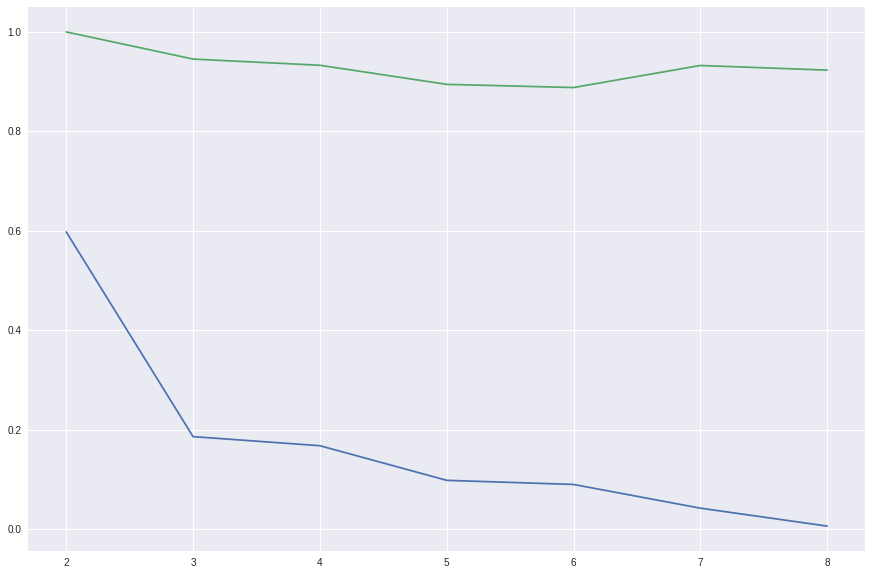

In [17]:
#plt.plot(np.arange(2,10), (errors/np.sum(breast_data)))
plt.figure(figsize=(15,10))
plt.plot(possible_atoms, stabilities)
plt.plot(possible_atoms, errors/np.max(errors))
plt.show()

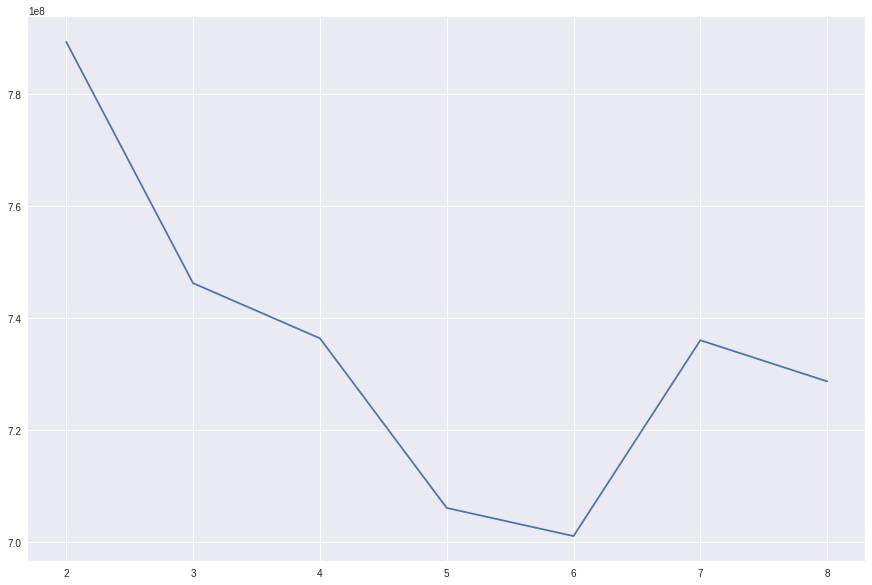

In [18]:
plt.figure(figsize=(15,10))
plt.plot(possible_atoms, errors)
plt.show()

In [9]:
D = Ds[4]
C = Cs[4]
print(D.shape)
print(C.shape)

(6, 88)
(21, 6)


In [10]:
D = add_removed_cols(D, removed_cols)
D_ordered = ordering_for_types(D, types)

In [11]:
percentages = np.zeros_like(C)

for sample in range(C.shape[0]):
    total = np.sum(C[sample,:])
    if(total != 0):
        percentages[sample,:] = C[sample, :] / total 

print(percentages)

[[ 0.27602948  0.20073251  0.13413266  0.13512229  0.0962173   0.15776576]
 [ 0.66826248  0.08465327  0.08032913  0.06018714  0.03525187  0.07131611]
 [ 0.0844791   0.25636359  0.13552477  0.18865154  0.11315117  0.22182982]
 [ 0.2691103   0.20837695  0.12962249  0.14475779  0.12757042  0.12056205]
 [ 0.2733041   0.12850281  0.12476684  0.16217379  0.13237914  0.17887332]
 [ 0.14461869  0.20809684  0.18390211  0.15901264  0.16152926  0.14284046]
 [ 0.1974016   0.1178661   0.12256424  0.15217455  0.25807115  0.15192236]
 [ 0.66725375  0.03733005  0.03017024  0.15857559  0.03486105  0.07180933]
 [ 0.45988906  0.0535164   0.05491782  0.229449    0.06462424  0.13760348]
 [ 0.21982253  0.15076176  0.10203027  0.13463398  0.14330737  0.24944408]
 [ 0.47867022  0.02303725  0.03152474  0.18734279  0.02951646  0.24990854]
 [ 0.7704974   0.04437239  0.02288409  0.05592991  0.04080373  0.06551249]
 [ 0.41283895  0.09731731  0.0464985   0.19281273  0.15970451  0.090828  ]
 [ 0.18357731  0.19000385

In [12]:
max_indices = np.zeros((percentages.shape[1]))
max_values = np.zeros((percentages.shape[1]))

for atom in range(percentages.shape[1]):
    max_indices[atom] = np.argmax(percentages[:,atom])
    max_values[atom] = percentages[int(max_indices[atom]), atom]

In [ ]:
atom=0
print("The percentages of usage is: ", max_values[atom])

sample = data[int(max_indices[atom]), :]
print(D[atom,:].shape)
print(sample.shape)
plot_coverage(D[atom,:]*C[int(max_indices[atom]), atom], sample)
    

In [ ]:
atom=1
print("The percentages of usage is: ", max_values[atom])

sample = data[int(max_indices[atom]), :]
print(D[atom,:].shape)
print(sample.shape)
plot_coverage(D[atom,:]*C[int(max_indices[atom]), atom], sample)
    

In [ ]:
atom=2
print("The percentages of usage is: ", max_values[atom])

sample = data[int(max_indices[atom]), :]
print(D[atom,:].shape)
print(sample.shape)
plot_coverage(D[atom,:]*C[int(max_indices[atom]), atom], sample)

In [ ]:
atom=3
print("The percentages of usage is: ", max_values[atom])

sample = data[int(max_indices[atom]), :]
print(D[atom,:].shape)
print(sample.shape)
plot_coverage(D[atom,:]*C[int(max_indices[atom]), atom], sample)

(21, 6)
[ 13.   2.   0.   1.   1.   1.]


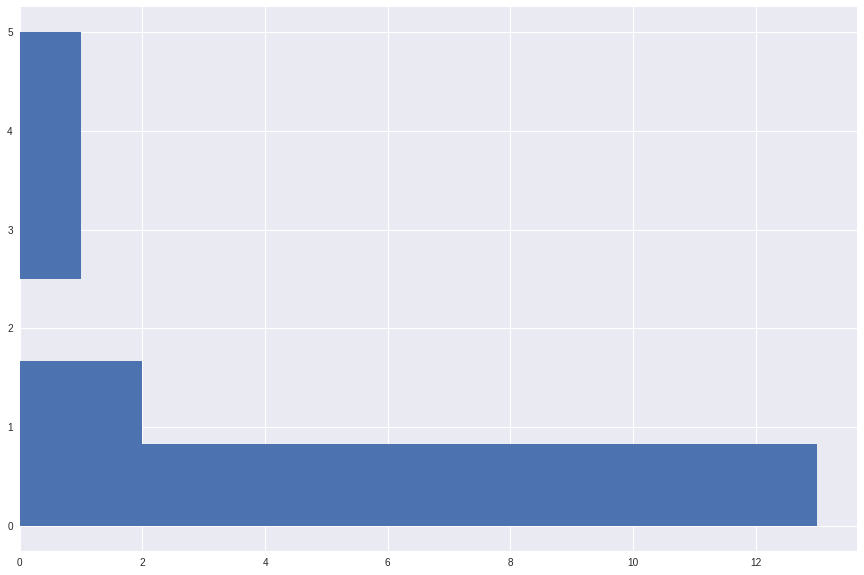

In [13]:
percentages[np.where(percentages<0.25)] = 0
frequencies = np.zeros(D.shape[0])
print(percentages.shape)
for atom in range(percentages.shape[1]):
    frequencies[atom]= len(np.nonzero(percentages[:,atom])[0])
print(frequencies)
plt.figure(figsize=(15,10))
plt.hist(np.arange(D.shape[0]),weights=frequencies, bins=D.shape[0], orientation="horizontal");
plt.show()

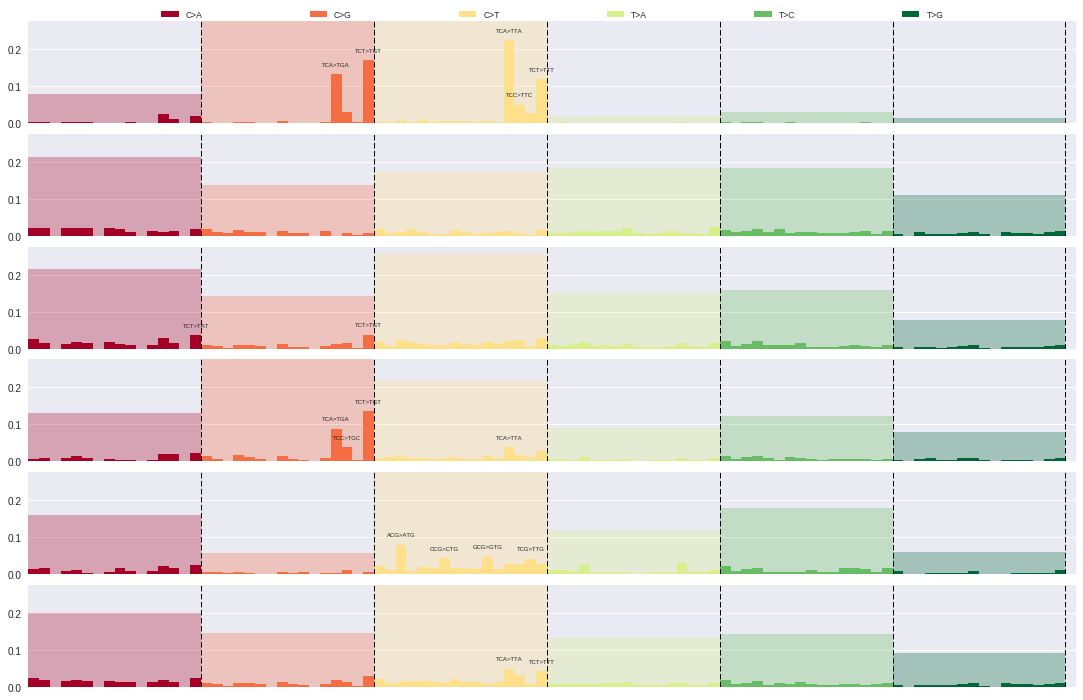

In [14]:
plot_genome_mutations(D_ordered)

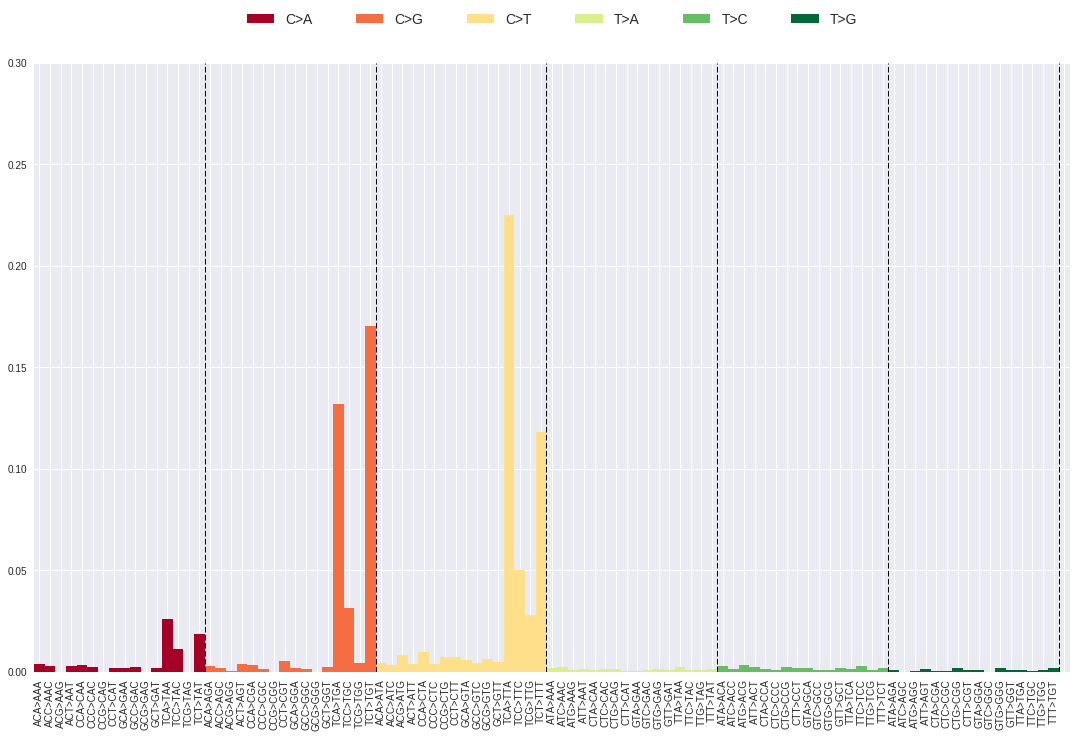

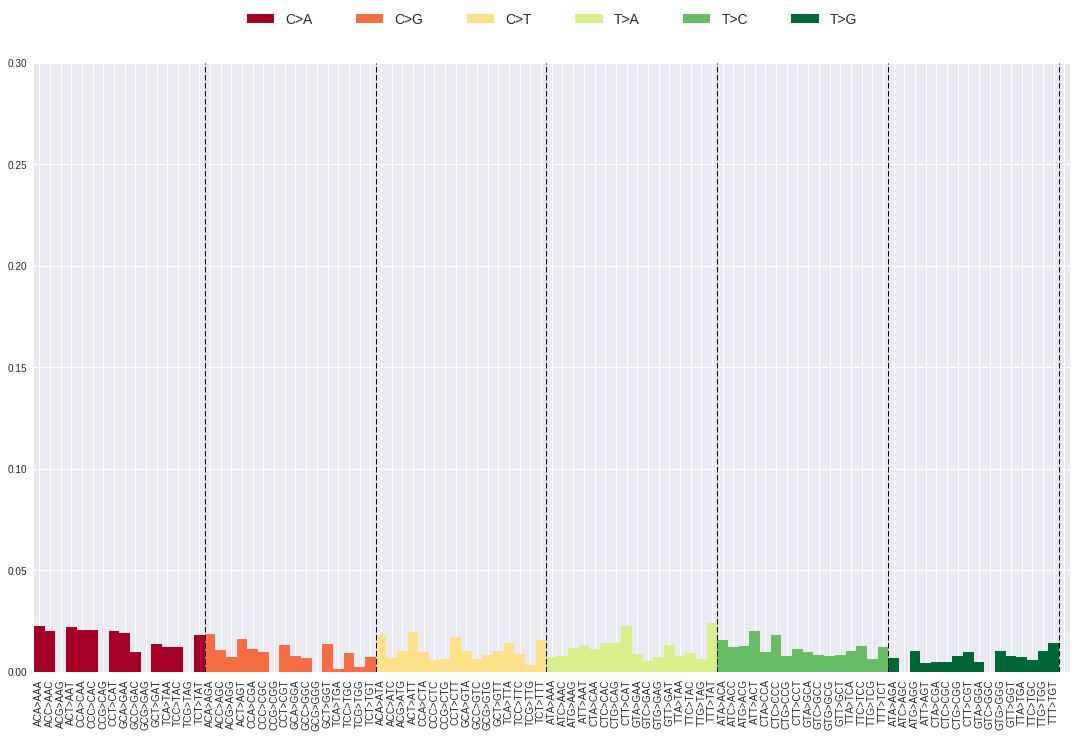

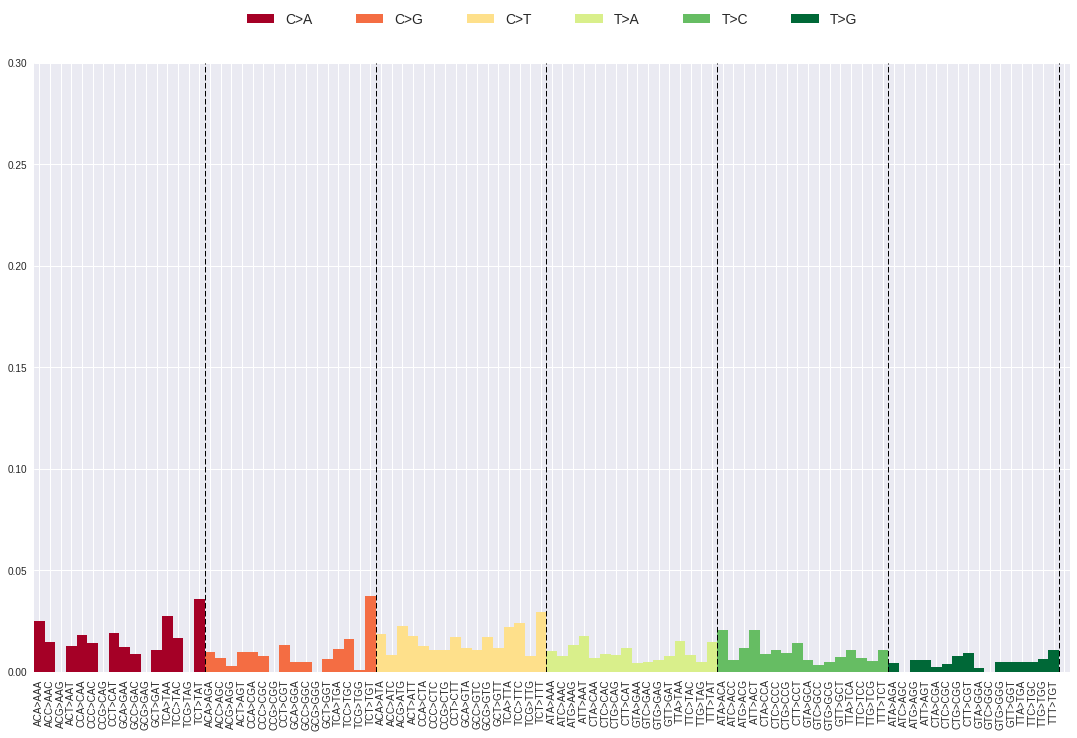

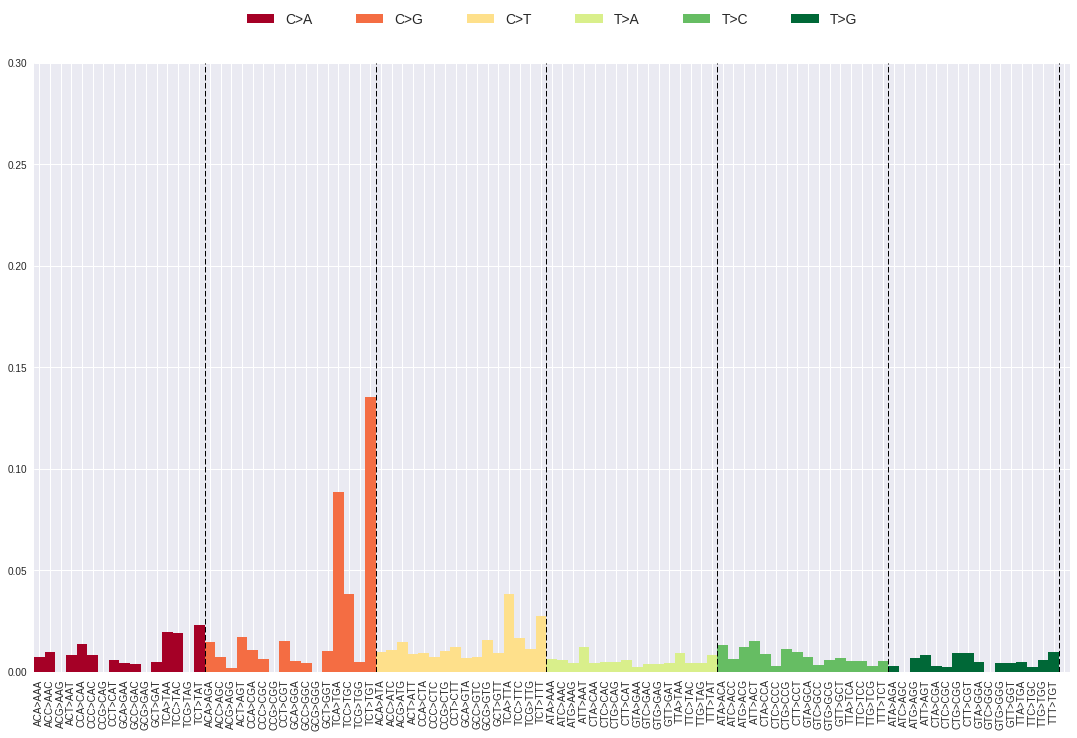

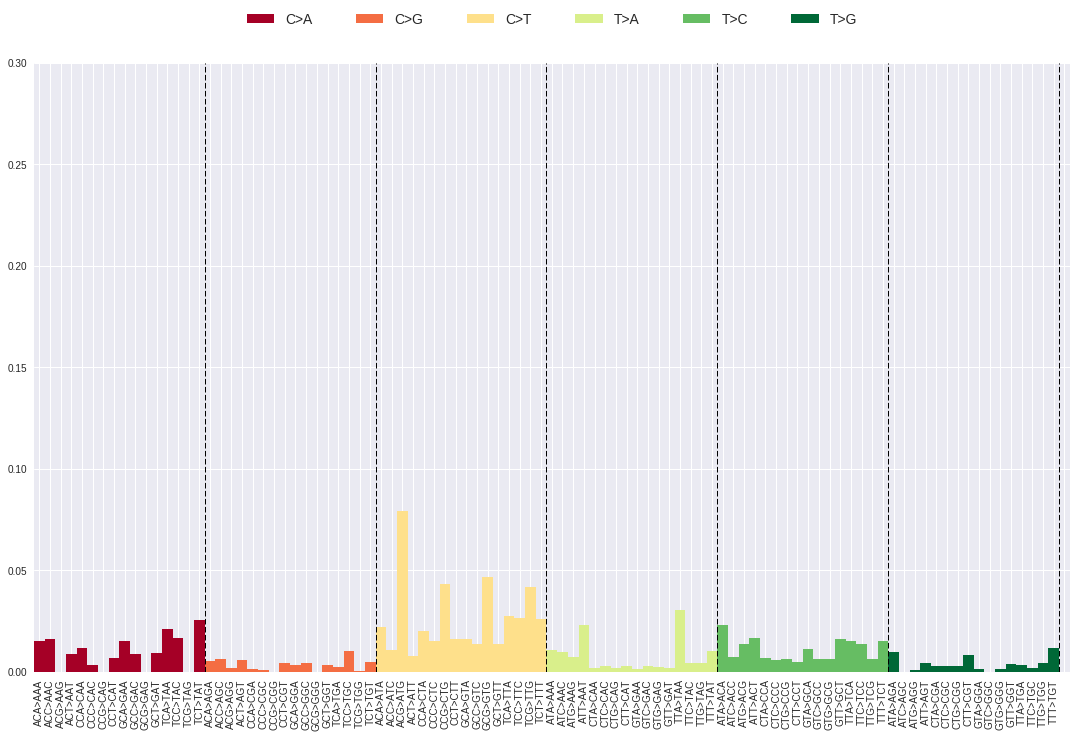

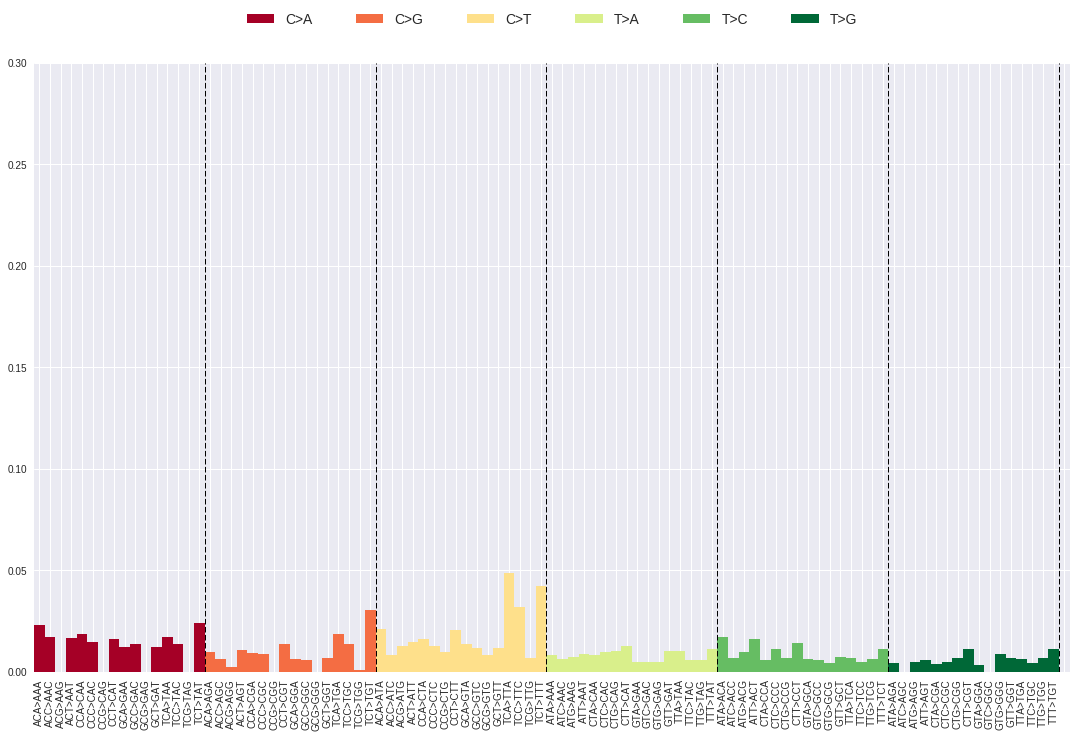

In [19]:
for i in range(D_ordered.shape[0]):
    plot_atom(D_ordered[i,:])

In [15]:
np.save("breast25_hisMethod/D_ordered_done_8may.npy", D_ordered)
np.save("breast25_hisMethod/coefficients_done_8may.npy", C)
np.save("breast25_hisMethod/dictionary_done_8may.npy", D)
np.save("breast25_hisMethod/stabilities_done_8may.npy", stabilities)
np.save("breast25_hisMethod/errors_done_8may.npy", errors)
np.save("breast25_hisMethod/possible_atoms_done_8may.npy", possible_atoms)